In [35]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

In [36]:
iris = load_iris()

In [37]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [38]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [39]:
df = pd.DataFrame(np.c_[iris['data'], iris['target']], columns = np.append(iris['feature_names'], ['target']))

In [40]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [41]:
df = df.sample(frac =1)  
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
127,6.1,3.0,4.9,1.8,2.0
101,5.8,2.7,5.1,1.9,2.0
64,5.6,2.9,3.6,1.3,1.0
39,5.1,3.4,1.5,0.2,0.0
138,6.0,3.0,4.8,1.8,2.0


In [42]:
df.shape

(150, 5)

In [43]:
df.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [44]:
df = df.dropna()

In [45]:
x = df.iloc[:, 0:4].values
y = df.iloc[:, 4].values

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size = 0.25)

In [48]:
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((112, 4), (38, 4), (112,), (38,))

In [49]:
from sklearn import svm

In [50]:
model = svm.SVC(kernel = 'rbf')
model.fit(xtrain, ytrain)

SVC()

In [51]:
y_pred = model.predict(xtest)
y_train = model.predict(xtrain)

In [52]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [53]:
ytrain.shape, xtrain.shape

((112,), (112, 4))

In [56]:
print('Accuracy of training set:', accuracy_score(ytrain, y_train))
print('Accuracy of test set:', accuracy_score(ytest, y_pred))

Accuracy of training set: 0.9642857142857143
Accuracy of test set: 0.8947368421052632


In [25]:
cm = confusion_matrix(ytest, y_pred)
cm

array([[18,  0,  0],
       [ 0,  9,  1],
       [ 0,  1,  9]], dtype=int64)

In [26]:
x.shape, y.shape

((150, 4), (150,))

In [27]:
import seaborn as sns

<AxesSubplot:>

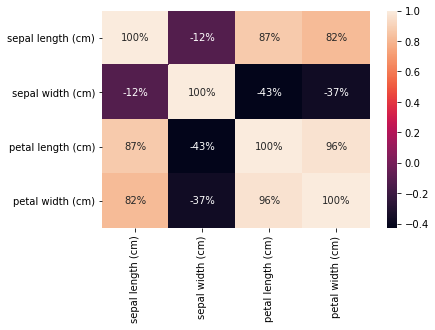

In [28]:
# sns.heatmap(cm, annot = True)
sns.heatmap(df.iloc[:, 0:4].corr(), annot = True, fmt = '.0%')

Text(0.5, 1.0, 'Confusion matrix')

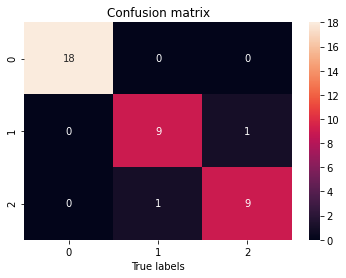

In [29]:
import matplotlib.pyplot as plt
ax = plt.subplot()
sns.heatmap(cm, annot = True, ax = ax)
ax.set_xlabel('Predicted labels')
ax.set_xlabel('True labels')
ax.set_title('Confusion matrix')